In [20]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm, time #helper libraries

In [21]:
#Step 1 - Loading Data
X_train, y_train, X_test, y_test = lstm.load_data('spRaw.csv', 50, True)

In [22]:
#Step 2 - Building Model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print ('compilation time : ', time.time() - start)

compilation time :  0.024665117263793945


In [23]:
#Step 3 - Training the model
model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=1,
    validation_split=0.05)

Train on 14884 samples, validate on 784 samples
Epoch 1/1
14884/14884 [==============================] - 16s 1ms/step - loss: 9.1574e-04 - val_loss: 5.7399e-04


yo


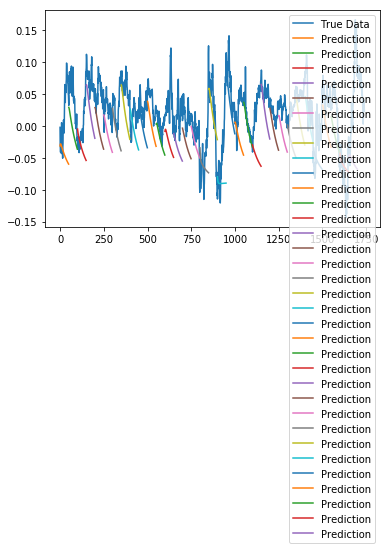

In [25]:
#Step 4 - Plot the predictions!
predictions = lstm.predict_sequences_multiple(model, X_test, 50, 50)
lstm.plot_results_multiple(predictions, y_test, 50)